# 多层感知机(Multiple Layer Perceptron)
&emsp;&emsp;在之前的softmax多分类回归模型中，模型的输入通过一个仿射变换（或称全连接层）得到一个原始输出，随后为了使输出符合概率的基本原则，又进行了指数归一化操作，也即softmax操作，在此基础上又介绍了交叉熵损失等等。为了更好的对非线性的输出进行拟合，首先想到的是增加层数，这些层称为隐含层，每一层与上一层都是全相联的，对于具有输入的某一个节点，他的输出取决于两个部分或者说两步操作，首先是得到输入的仿射变换，其次是对仿射变换得到的原始输出通过一个激活函数（非线性的）得到节点输出，该输出会被导入到下一层的各个节点。

---
## 网络结构分析
以单隐含层网络结构为例，设输入是包含n个样例每个样例由d个特征描述的数据集，输出包含q个分类，则网络输入节点为d个，隐含层假定为h个节点，输出层为q个节点。输入矩阵为(n,d), 输入层到输出层的权重矩阵为(d,h), 隐含层变量为(n, h), 隐含层到输出层的权重矩阵为(h, q), 输出大小为(n, q)

---
## 激活函数
(1) ReLU(x) = max(0, x)

(2) sigmoid(x) = 1/(1+exp(-x))

(3) tanh(x) = (1-exp(-2x))/(1+exp(-2x))

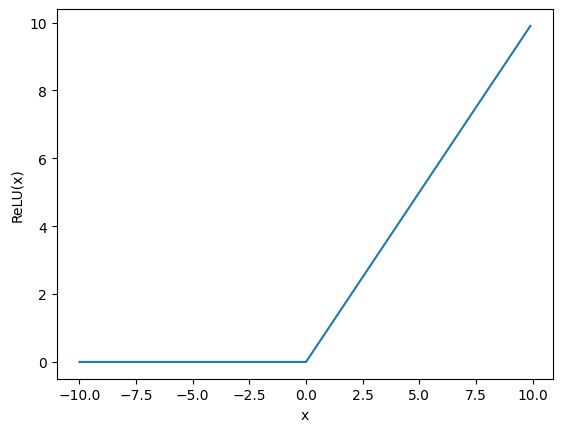

In [14]:
import torch
from matplotlib import pyplot as plt

x = torch.arange(-10, 10, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach()) # 脱离计算图
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.show()

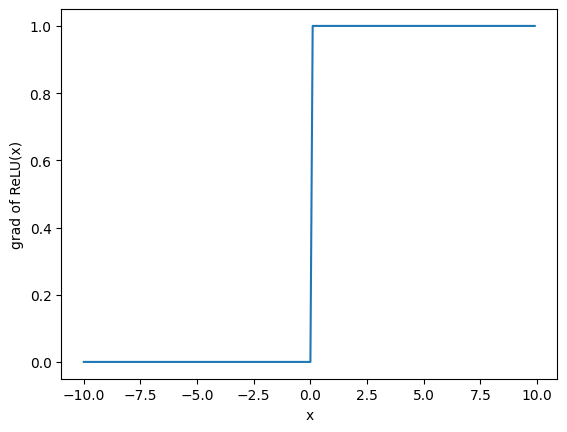

In [15]:
y.sum().backward()
plt.plot(x.detach(), x.grad) # 导数计算
plt.xlabel("x")
plt.ylabel("grad of ReLU(x)")
plt.show()

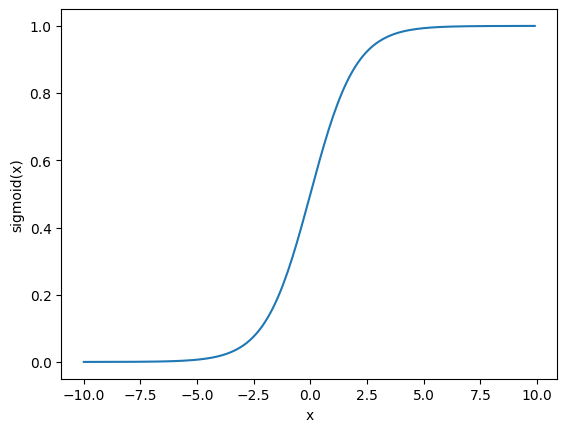

In [16]:
## 接下来是sigmoid
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach()) # 脱离计算图
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

Text(0, 0.5, 'gradient of sigmoid()')

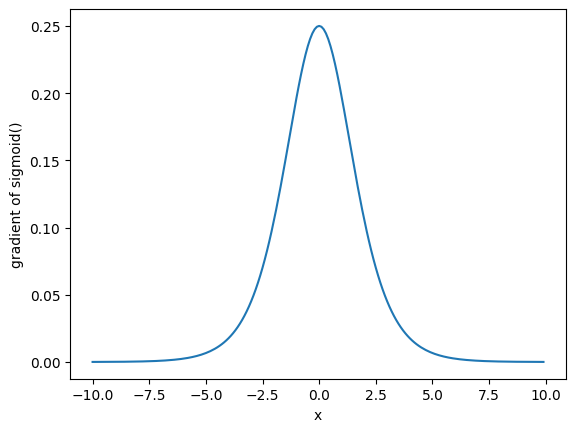

In [17]:
x.grad.zero_() # 清零
y.sum().backward()
plt.plot(x.detach(), x.grad)
plt.xlabel("x")
plt.ylabel("gradient of sigmoid()")

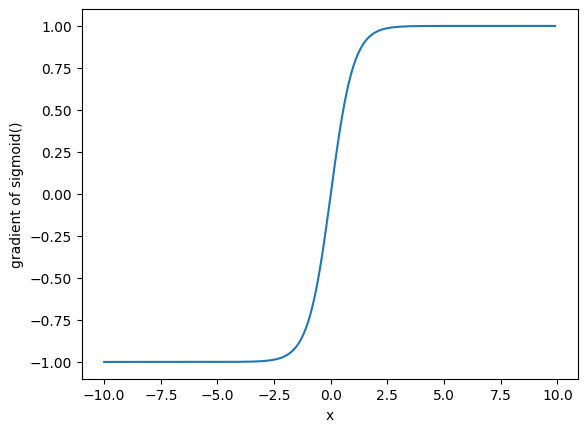

In [18]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("gradient of sigmoid()")
plt.show()

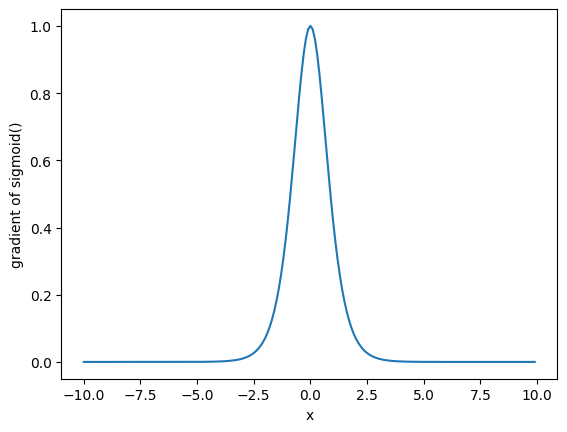

In [22]:
x.grad.zero_()
y.sum().backward()
plt.plot(x.detach(), x.grad)
plt.xlabel("x")
plt.ylabel("gradient of sigmoid()")
plt.show()

### tensor.backward()
`torch.tensor.backward(gradient=None, retain_graph=None, create_graph=False, inputs=None)`
#### 使用情况举例
（1）y.backward()--y是标量
输入x是一个requires_grad的tensor, y是关于x的标量函数, backward()不携带任何参数, 输出x.grad即为y关于x的每一个分量的导数, 且形状与x相同；

（2）y.backward(gradient=g)--y是向量
y是一个m维向量, x是一个n维向量, out.backward(gradient=g)后是一个与a维数相同的向量，gradient的维数与out维数相同。含义是向量y是向量x的函数, y对x的偏导构成了m行n列的矩阵，称为雅可比矩阵JaccobiMatrix, J[i,j]表示y的第i个分量对x的第j个分量的偏导，backward()中的gradient参数则表示另一个标量函数f（它是关于y的函数）对y的偏导数，于是 `g * J` 就得到了f对x的偏导数。另一个对gradient的理解是它是权重系数。

参考：
【1】[荷楠仁ARTS-S pytorch中backward函数的gradient参数作用 ](https://www.cnblogs.com/zhouyang209117/p/11023160.html)

In [11]:
# （1）out.backward()--out是标量
x = torch.tensor([2.0, 3.0, 5.0], requires_grad=True)
out = 3*a[0]**2 + 4*a[1] + 2.3*a[2]
out.backward()
a.grad

tensor([12.0000,  4.0000,  2.3000])

In [13]:
out = torch.zeros(2)
out[0] = 3*a[0]**2 + 4*a[2]
out[1] = 2*a[1]**2 + 5*a[0]
a.grad.zero_()
out.backward(gradient=torch.FloatTensor([2, 3]))
a.grad # 实际含义是

tensor([39., 36.,  8.])